In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
data_path = 'covid-udemy class/II/raw/JohnHopkins/COVID-19/csse_covid_19_data/csse_covid_19_time_series/'

confirmed_raw = pd.read_csv(data_path+'time_series_covid19_confirmed_global.csv')
deaths_raw = pd.read_csv(data_path+'time_series_covid19_deaths_global.csv')
recovered_raw = pd.read_csv(data_path+'time_series_covid19_recovered_global.csv')


confirmed_raw = confirmed_raw.rename(columns={'Province/State': 'state', 'Country/Region': 'country'})
confirmed_raw.drop(['Lat', 'Long', 'state'], axis=1, inplace=True)

deaths_raw = deaths_raw.rename(columns={'Province/State': 'state', 'Country/Region': 'country'})
deaths_raw.drop(['Lat', 'Long', 'state'], axis=1, inplace=True)

recovered_raw = recovered_raw.rename(columns={'Province/State': 'state', 'Country/Region': 'country'})
recovered_raw.drop(['Lat', 'Long', 'state'], axis=1, inplace=True)


confirmed_raw = confirmed_raw.set_index(['country']).T.stack(level=[0]).reset_index().rename(columns={'level_0':'date', 0:'confirmed'})
deaths_raw = deaths_raw.set_index(['country']).T.stack(level=[0]).reset_index().rename(columns={'level_0':'date', 0:'deaths'})
recovered_raw = recovered_raw.set_index(['country']).T.stack(level=[0]).reset_index().rename(columns={'level_0':'date', 0:'recovered'})

cases = (confirmed_raw.merge(recovered_raw, on=['date', 'country'], how = 'inner')).merge(deaths_raw, on=['date', 'country'], how = 'inner')
cases['date'] = cases['date'].astype('datetime64[ns]')
cases.head()

,date,country,confirmed,recovered,deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [4]:
cases.tail()

,date,country,confirmed,recovered,deaths
7690155,2020-08-02,Sao Tome and Principe,874,787,15
7690156,2020-08-02,Yemen,1734,862,497
7690157,2020-08-02,Comoros,386,330,7
7690158,2020-08-02,Tajikistan,7495,6276,61
7690159,2020-08-02,Lesotho,718,173,19


In [57]:
# confirmed_raw['date'] = confirmed_raw['date'].astype('datetime64[ns]')
# deaths_raw['date'] = deaths_raw['date'].astype('datetime64[ns]')
# recovered_raw['date'] = recovered_raw['date'].astype('datetime64[ns]')

# # plt.figure(figsize=(12, 6))
# fig, axes = plt.subplots(nrows=3, ncols=2, sharex=True)
# confirmed_raw.groupby('date').sum().plot(ax=axes[0,0], figsize=(12, 6))
# confirmed_raw.groupby('date').sum().plot(ax=axes[0,1], grid=True, logy=True, figsize=(12, 6))

# deaths_raw.groupby('date').sum().plot(ax=axes[1,0])
# deaths_raw.groupby('date').sum().plot(ax=axes[1,1], grid=True, logy=True, figsize=(12, 6))

# recovered_raw.groupby('date').sum().plot(ax=axes[2,0])
# recovered_raw.groupby('date').sum().plot(ax=axes[2,1], grid=True, logy=True, figsize=(12, 6))

# plt.axis('tight')

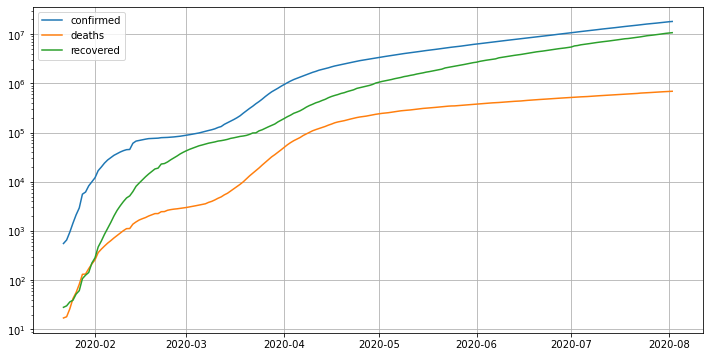

In [56]:
fig = plt.figure(figsize=(12, 6))
for frame, legend in [(confirmed_raw, 'confirmed'), (deaths_raw, 'deaths'), (recovered_raw, 'recovered')]:
    plt.semilogy(frame.groupby('date').count().index, frame.groupby('date').sum(), label=legend)
    
plt.grid()
plt.legend()

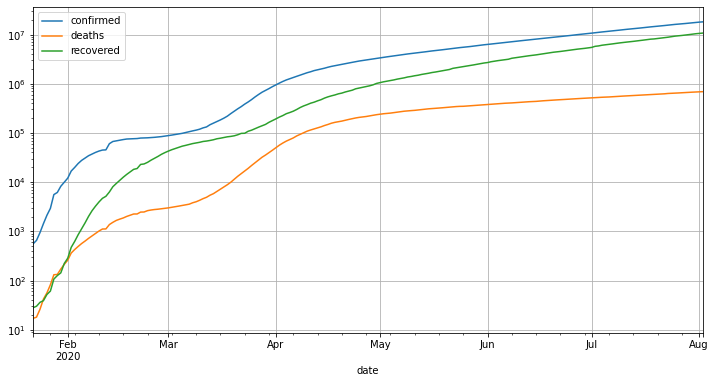

In [63]:
df_plot = (confirmed_raw.groupby('date').sum().join(deaths_raw.groupby('date').sum(), on='date')).join(recovered_raw.groupby('date').sum(), on='date')
df_plot.plot(grid=True, logy=True, figsize=(12, 6));

In [5]:
groupedCountry = cases.groupby('country')
groupedCountry.sum()['confirmed'].nlargest(12)

country
China             15960006117
United Kingdom     3457512685
France             2728688182
US                  251474666
Canada              140920892
Netherlands         137383150
Brazil              105274564
Australia            68001472
India                50882248
Russia               50422601
Spain                29124653
Italy                28229006
Name: confirmed, dtype: int64

<AxesSubplot:ylabel='country'>

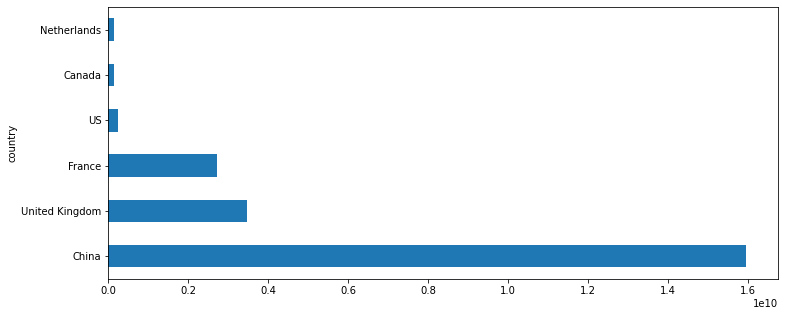

In [17]:
groupedCountry.sum()['confirmed'].nlargest(6).plot(kind='barh', figsize=(12,5))

<AxesSubplot:ylabel='country'>

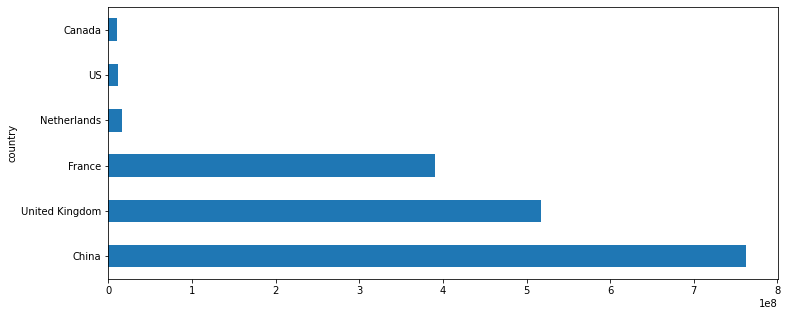

In [18]:
groupedCountry.sum()['deaths'].nlargest(6).plot(kind='barh', figsize=(12,5))

<AxesSubplot:ylabel='country'>

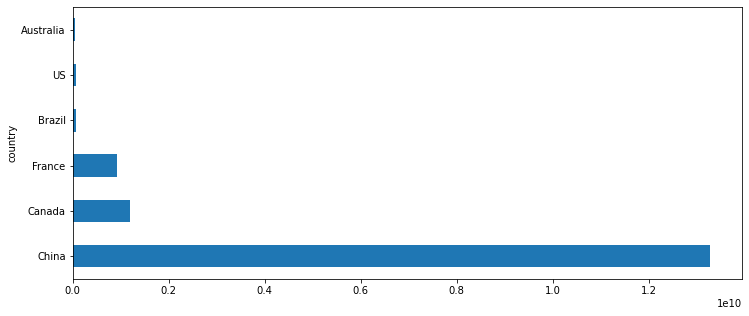

In [19]:
groupedCountry.sum()['recovered'].nlargest(6).plot(kind='barh', figsize=(12,5))

In [4]:
# grouping the cases dataframe countrywise
casesGrouped = groupedCountry.sum().reset_index()
casesGrouped.head()

,country,confirmed,recovered,deaths
0,Afghanistan,2155866,950986,56749
1,Albania,228192,136310,6644
2,Algeria,1360239,877748,85196
3,Andorra,99926,73908,5735
4,Angola,29360,8893,1385


In [5]:
topAffectedCountries = groupedCountry.sum()['confirmed'].nlargest(12).index.tolist()

# bottomAffectedCountries = groupedCountry.sum()['Confirmed'].sort_values(ascending=True).head(50).index.tolist()
print(topAffectedCountries)
# print(bottomAffectedCountries)

['China', 'United Kingdom', 'France', 'US', 'Canada', 'Netherlands', 'Brazil', 'Australia', 'India', 'Russia', 'Spain', 'Italy']


In [6]:
demographics = pd.read_csv('countries_data.csv', index_col=0)
demographics.head(3)

,COUNTRY,POPULATION,BIRTH RATE,DEATH RATE,MEDIAN AGE,GDP,UNEMPLOYMENT RATE
0,Afghanistan,36643815.0,36.7,12.7,19.5,2000.0,23.9
1,Albania,3074579.0,13.0,7.1,34.3,12500.0,13.8
2,Algeria,42972878.0,20.0,4.4,28.9,15200.0,11.7


In [7]:
demographics['COUNTRY'] = demographics['COUNTRY'].apply(lambda country: 'US' if country == 'United States' else country)
set(demographics['COUNTRY'].values.tolist()).intersection(set(topAffectedCountries))

{'Australia',
 'Brazil',
 'Canada',
 'China',
 'France',
 'India',
 'Italy',
 'Netherlands',
 'Russia',
 'Spain',
 'US',
 'United Kingdom'}

In [8]:
casesTop = casesGrouped[casesGrouped['country'].isin(topAffectedCountries)].reset_index(drop=True)

# _ = list(set(demographics['COUNTRY'].values.tolist()).intersection(set(topAffectedCountries)))
# casesTop = casesTop[casesTop['country'].isin(_)]
casesTop

,country,confirmed,recovered,deaths
0,Australia,68001472,49390848,804992
1,Brazil,105274564,66350943,4488112
2,Canada,140920892,1202373956,10549602
3,China,15960006117,13288781682,762718176
4,France,2728688182,928302683,390832541
5,India,50882248,30273038,1328707
6,Italy,28229006,16872156,3918542
7,Netherlands,137383150,466950,16483275
8,Russia,50422601,28910737,702373
9,Spain,29124653,15995839,3203687


In [9]:
casesTop['median_age'] = casesTop['country'].apply(lambda country: demographics[demographics['COUNTRY']==country]['MEDIAN AGE'].values[0]).tolist()
casesTop

,country,confirmed,recovered,deaths,median_age
0,Australia,68001472,49390848,804992,37.5
1,Brazil,105274564,66350943,4488112,33.2
2,Canada,140920892,1202373956,10549602,41.8
3,China,15960006117,13288781682,762718176,38.4
4,France,2728688182,928302683,390832541,41.7
5,India,50882248,30273038,1328707,28.7
6,Italy,28229006,16872156,3918542,46.5
7,Netherlands,137383150,466950,16483275,42.8
8,Russia,50422601,28910737,702373,40.3
9,Spain,29124653,15995839,3203687,43.9


In [10]:
def get_ageCategories(age):
    if age>0 and age<=20:
        return '0-20'
    elif age>20 and age<=30:
        return '21-30'
    elif age>30 and age<=40:
        return '31-40'
    elif age>40 and age<=50:
        return '41-50'
    elif age>50 and age<=60:
        return '51-60'
    

casesTop['median_age_cat.'] = casesTop['median_age'].apply(get_ageCategories)

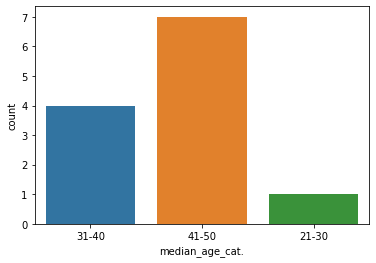

In [11]:
sns.countplot(casesTop['median_age_cat.'])

In [12]:
# data give in the units of thousands
# https://population.un.org/wpp/DataQuery/
    
ageData = pd.read_csv('ageDistribution.csv', index_col=0)
ageData

,US,Brazil,Russia,India,Spain,United Kingdom
Location,,,,,,
0-4,19676,14475,9272,116880,1990,3924
5-9,20045,14602,9351,117982,2244,4120
10-14,21089,14942,8174,126156,2498,3956
15-19,21243,16218,7082,126046,2238,3686
20-24,22259,17152,6615,122505,2256,4075
25-29,23835,16953,8993,117397,2362,4484
30-34,23052,17148,12544,112176,2619,4707
35-39,21616,17329,11925,103460,3283,4588
40-44,20295,15661,10605,90220,4001,4308


Text(0, 0.5, '[Population] thousands')

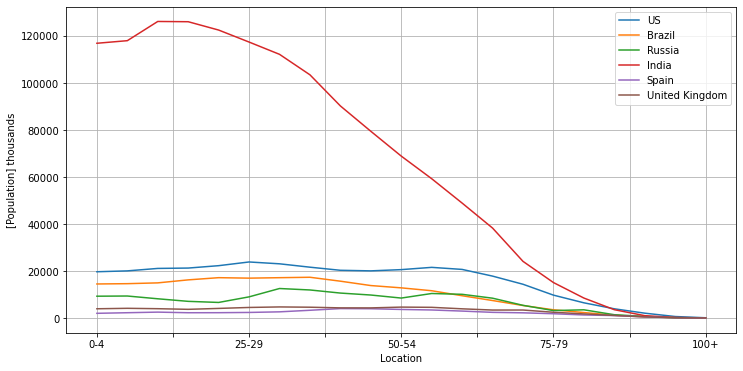

In [13]:
ax = ageData.plot(figsize=(12,6), grid=True)
# ax.set_xticklabels(ageData['Age Group']);
# ax.set_xlabel('[Age Groups]')
ax.set_ylabel('[Population] thousands')

In [14]:
for country in ageData.columns.tolist():
    ageData[country] = ageData[country]/ageData[country].sum()

In [15]:
from scipy import signal

data = {country: signal.savgol_filter(ageData[country], window_length=3, polyorder=1) 
        for country in ageData.columns.tolist()}
filtered = pd.DataFrame(data) 
filtered.tail()

,US,Brazil,Russia,India,Spain,United Kingdom
16,0.020242,0.010952,0.018353,0.006547,0.029503,0.025813
17,0.012510,0.006277,0.012663,0.003143,0.019949,0.016233
18,0.006635,0.002856,0.004934,0.001147,0.011564,0.008342
19,0.002795,0.001046,0.001779,0.000305,0.004249,0.003128
20,-0.000157,-0.000107,-0.000479,-0.000037,-0.000649,-0.000371


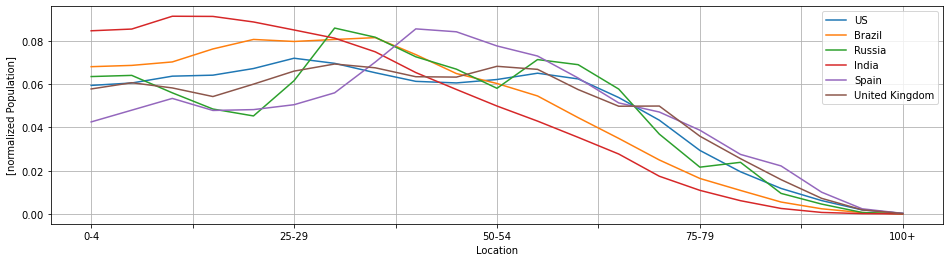

In [16]:
ax = ageData.plot(figsize=(16,4), grid=True)
ax.set_ylabel('[normalized Population]');

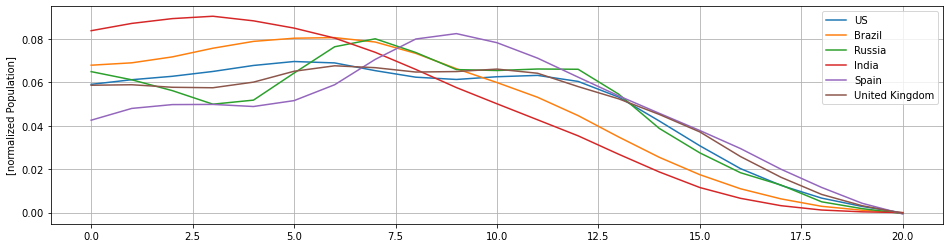

In [17]:
ax = filtered.plot(figsize=(16,4), grid=True)
ax.set_ylabel('[normalized Population]');

In [20]:
cou

(188, 194)

In [ ]:
import time
start = time.time()

countries = sorted(cases['country'].unique())
dates = cases['date'].sort_values().unique()

f_data = {'date': dates}
for country in countries:
    f = []
    for date in dates:
        try:
            num = cases[(cases['date']==date) & (cases['country']==country)]['confirmed'].values[0]
            den = demographics[demographics['COUNTRY']==country]['POPULATION'].values[0]
            f.append(num/den)
        except:
            print('Ignoring {} as population data not available!'.format(country))
            break
    f_data[country] = f
    print('{} done!'.format(country))
    
f_df = pd.DataFrame(f_data)
f_df

end = time.time()
print('Finished in {} secs.'.format(end-start))

Afghanistan done!
Albania done!
Algeria done!
Andorra done!
Angola done!
Antigua and Barbuda done!
Argentina done!
Armenia done!
Australia done!
Austria done!
Azerbaijan done!
Ignoring Bahamas as population data not available!
Bahamas done!
Bahrain done!
Bangladesh done!
Barbados done!
Belarus done!
Belgium done!
Belize done!
Benin done!
Bhutan done!
Bolivia done!
Bosnia and Herzegovina done!
Botswana done!
Brazil done!
Brunei done!
Bulgaria done!
Burkina Faso done!
Burma done!
Ignoring Burundi as population data not available!
Burundi done!
Cabo Verde done!
Cambodia done!
Cameroon done!
Canada done!
Central African Republic done!
Ignoring Chad as population data not available!
Chad done!
Chile done!
China done!
Colombia done!
Comoros done!
Ignoring Congo (Brazzaville) as population data not available!
Congo (Brazzaville) done!
Ignoring Congo (Kinshasa) as population data not available!
Congo (Kinshasa) done!
Costa Rica done!
Cote d'Ivoire done!
Croatia done!
Cuba done!
Cyprus done!
Cz

In [19]:
'Bahamas' in demographics['COUNTRY']

False